<a href="https://colab.research.google.com/github/thanksbinh/student-posts-classifier/blob/main/StudentRequestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
vietnamese_stopwords = [
    'ạ', 'á', 'để', 'đang', 'đã', 'sẽ', 'với', 'và', 'nhé', 'nha', 'nhiều', 'nè',
    'là', 'hoặc', 'của', 'có', 'các', 'cho', 'ơi',
    'thì', 'nếu', 'trong', 'này', 'không', 'nào'
]
vietnamese_stopwords.sort(reverse=True)
print(vietnamese_stopwords)

# https://howtovietnamese.com/vietnamese-text-abbreviations-slang/
chat_words = {
    "a": "anh",
    "c": "chị",
    "cj": "chị",
    "e": "em",
    "ae": "anh_em",
    "ce": "chị_em",
    "ace": "anh_chị_em",
    "b": "bạn",
    "t": "tớ",
    "tui": "tớ",
    # "m": "mày",
    "m": "mình",
    "mk": "mình",
    "mik": "mình",
    "mng": "mọi_người",
    "mn": "mọi_người",
    "ng": "người",

    "iu": "yêu",
    "ct": "chia_tay",
    "ny": "người_yêu",
    "vk": "vợ",
    "ck": "chồng",

    "h": "giờ",
    "g": "giờ",
    "p": "phút",
    # "bh": "bây giờ",
    # "bh": "bao giờ",
    "hqua": "hôm_qua",
    "htrc": "hôm_trước",

    "ib": "inbox",
    "lb": "inbox",
    "ibox": "inbox",
    "nt": "nhắn_tin",
    # "nc": "nói chuyện",
    # "nc": "nói chung",
    # "nch": "nói chuyện",
    # "nch": "nói chung",
    "nchuyen": "nói_chuyện",
    "mún": "muốn",
    "bít": "biết",
    "bik": "biết",
    "cb": "chuẩn_bị",

    "dt": "điện_thoại",
    "đt": "điện_thoại",
    "bt": "bình_thường",
    "bth": "bình_thường",

    "j": "gì",
    "b": "bạn",
    "bn": "bạn",
    "cban": "các bạn",
    "bb": "bạn_bè",
    # "bn": "bao nhiêu",
    "ntn": "như_thế_nào",

    "kh": "không",
    "k": "không",
    "khong": "không",
    "ko": "không",
    "hem": "không",
    "hong": "không",
    "khum": "không",
    # "hok": "không",
    "đc": "được",
    "dc": "được",
    "r": "rồi",
    "nhìu": "nhiều",
    "wá": "quá",
    "cx": "cũng",
    "uk": "ừ",
    "uh": "ừ",
    "ukm": "ừ",
    "g9": "ngủ_ngon",
    "vn": "việt_nam",

    "lquan": "liên_quan",
    "cs": "có",
    "ah": "à",
    "vs": "với",
    # "sn": "sinh năm",
    # "sn": "sinh nhật",
    "ak": "à",
    "ah": "ạ",
    "cmt": "comment",
    "s": "sao",
    "cgi": "cái gì",
    "v": "vậy",
    "lun": "luôn",
    "zới": "với",
    "gr": "group",
    "sl": "số_lượng",
    "ttv": "tuyển thành_viên",
    "tv": "thành_viên",
    # "rcm": "recomment",
    "zl": "zalo",
    "lh": "liên_hệ",
    "ad": "admin",
    "sđt": "số_điện_thoại",
    "đg": "đang",
    "yc": "yêu_cầu",
    "hn": "hà_nội",
    "nma": "nhưng_mà",
    "aii": "ai",

    # "hk1": "học kỳ 1",
    # "hk2": "học kỳ 2",
    # "nv1": "nguyện vọng 1",
    # "khtn": "khoa học tự nhiên",
    # "nlxh": "nghị luận xã hội",
    "hsg": "học_sinh_giỏi",
    "c3": "cấp_3",
    "lp": "lớp",
    "tl": "tài_liệu",
    # "hok": "học",
    "hc": "học",
    "hs": "học_sinh",
    "sv": "sinh_viên",
    "gv": "giáo_viên",
    "onl": "online",
    "off": "offline",
    "sp": "sư_phạm",
    "nn": "ngoại_ngữ",
    "gs": "gia_sư",
    "đh": "đại_học",
}

['ạ', 'ơi', 'để', 'đã', 'đang', 'á', 'với', 'và', 'trong', 'thì', 'sẽ', 'nếu', 'nè', 'này', 'nào', 'nhé', 'nhiều', 'nha', 'là', 'không', 'hoặc', 'của', 'có', 'các', 'cho']


In [2]:
!pip install py_vncorenlp
# !pip install emoji

In [3]:
# Import Basis Libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize

nltk.download('punkt')
df = pd.read_csv('/content/data_raw_02.csv')

# rename column
# df.rename(columns = {'label (depression result)':'Sentiment'}, inplace = True)
# df.rename(columns = {'message to examine':'review'}, inplace = True)

# Drop Columns
# df.drop('text',axis=1,inplace=True) # Text is post_text with header

# Drop rows
df.drop_duplicates(subset='post_id', inplace=True)
# df['post_text'] = df['post_text'].fillna('')
df.drop(df[df.post_text != df.post_text].index, inplace=True)

# Lowercase
df['post_text'] = df['post_text'].str.lower()
df.tail()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
16778,791061549819061,"chào mọi người, tớ là nữ 2k5 hiện đang học trê...",NaN,NaN,2024-07-05 11:35:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],3,1,0,NaN,Anonymous participant,NaN,False,3,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16789,791061863152363,"halloo mngg , mình 2k8 ngoi lên đây tìm 1 bạn ...",NaN,NaN,2024-07-05 11:35:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],2,2,0,NaN,Anonymous participant,NaN,False,2,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16790,790767139848502,mình 2007 mất gốc tiếng anh và bắt đầu học lại...,NaN,NaN,2024-07-04 23:04:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,"[None, None]",10,10,0,NaN,Anonymous participant,NaN,False,10,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16791,790742003184349,mình 2k4 tìm bạn học cũng là sinh viên học cùng 🥰,NaN,NaN,2024-07-04 22:16:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],1,9,0,NaN,Anonymous participant,NaN,False,1,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16792,791065829818633,"mình là nam, 2k7 tìm bạn học chung ạ\nhiện tại...",NaN,NaN,2024-07-05 11:44:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],1,0,0,NaN,Anonymous participant,NaN,False,1,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...


In [4]:
len(df)

10880

In [5]:
import os
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
# from sklearn.datasets.base import get_data_home

from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer


In [6]:
import py_vncorenlp

# Automatically download VnCoreNLP components from the original repository
# and save them in some local working folder
# py_vncorenlp.download_model(save_dir="/content/vncorenlp")

# Load VnCoreNLP from the local working folder that contains both `VnCoreNLP-1.2.jar` and `models`
model = py_vncorenlp.VnCoreNLP(save_dir='/content/vncorenlp')
# Equivalent to: model = py_vncorenlp.VnCoreNLP(annotators=["wseg", "pos", "ner", "parse"], save_dir='./vncorenlp')

def word_segment_wrapper(text):
  return " ".join(model.word_segment(text))

In [7]:
import re
import string

# Storing Punctuation in a Variable
punc = string.punctuation.replace("?", "")
punc

'!"#$%&\'()*+,-./:;<=>@[\\]^_`{|}~'

In [8]:
# Function to remove HTML Tags
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

# Here We also Use Regular Expressions to Remove URLs from Text or Whole Corpus.
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

# The code defines a function, remove_punc1, that takes a text input and removes all punctuation characters from it using
# the translate method with a translation table created by str.maketrans. This function effectively cleanses the text of punctuation symbols.
def remove_punc(text):
    return text.translate(str.maketrans('', '', punc))

In [9]:
df['post_text'] = df['post_text'].apply(remove_url)
df['post_text'] = df['post_text'].apply(remove_punc)
df.tail()

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
16778,791061549819061,chào mọi người tớ là nữ 2k5 hiện đang học trên...,NaN,NaN,2024-07-05 11:35:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],3,1,0,NaN,Anonymous participant,NaN,False,3,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16789,791061863152363,halloo mngg mình 2k8 ngoi lên đây tìm 1 bạn c...,NaN,NaN,2024-07-05 11:35:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],2,2,0,NaN,Anonymous participant,NaN,False,2,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16790,790767139848502,mình 2007 mất gốc tiếng anh và bắt đầu học lại...,NaN,NaN,2024-07-04 23:04:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,"[None, None]",10,10,0,NaN,Anonymous participant,NaN,False,10,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16791,790742003184349,mình 2k4 tìm bạn học cũng là sinh viên học cùng 🥰,NaN,NaN,2024-07-04 22:16:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],1,9,0,NaN,Anonymous participant,NaN,False,1,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16792,791065829818633,mình là nam 2k7 tìm bạn học chung ạ\nhiện tại ...,NaN,NaN,2024-07-05 11:44:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],1,0,0,NaN,Anonymous participant,NaN,False,1,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...


In [10]:
df['post_text'] = df['post_text'].apply(word_segment_wrapper)
df.head()

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
1,906358048077279,cần pass lại 2 quyển này ạ,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', ""May be an image o...",NaN,0,0,NaN,Anonymous participant,NaN,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Anonymous participant > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
4,906402471406170,môn_học nào em thấy khó nhất nhỉ ?,NaN,NaN,2024-10-09 10:00:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', None, None, None]",355.0,13,0,NaN,Thanh Ngọc,https://facebook.com/profile.php?id=6155790119...,False,355.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Thanh Ngọc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
5,905552854824465,nv1 của các cậu là trường nào ?,NaN,NaN,2024-10-08 18:03:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None, None]",33.0,25,0,NaN,Gạo Luộc,https://facebook.com/profile.php?id=1000930172...,False,33.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Gạo Luộc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
6,906378388075245,vào ib tớ nhé,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of 1 person and text that sa...",NaN,3,0,NaN,Ng Thuyy Lynhh,https://facebook.com/profile.php?id=1000900553...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Ng Thuyy Lynhh > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
7,906315738081510,điểm thi giữa kì của các tháng,NaN,NaN,2024-10-09 08:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'ĐIỂM TOÁN...",NaN,24,0,NaN,Nhật Hạ,https://facebook.com/profile.php?id=6156512453...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Nhật Hạ > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP


In [11]:
# Import this Library to Handle the Spelling Issue.
# from textblob import TextBlob

# # Incorrect text
# incorrect_text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'
# print(incorrect_text)
# # Text 2
# incorrect_text2 = 'The cat sat on the cuchion. while plyaiing'
# # Calling function
# textBlb = TextBlob(incorrect_text)
# textBlb1 = TextBlob(incorrect_text2)
# # Corrected Text
# print(textBlb.correct().string)
# print(incorrect_text2)
# print(textBlb1.correct().string)

# Todo: Handle Vietnamese Spelling Issue?

In [12]:
# We will USe the Emoji Libray to handle this task
# Pip Install emoji
import emoji

def remove_stopwords(text):
    new_text = []
    for i in text.split():
        if i not in vietnamese_stopwords:
            new_text.append(i)
    return " ".join(new_text)

def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i in chat_words:
            new_text.append(chat_words[i])
        else:
            new_text.append(i)
    return " ".join(new_text)

def give_emoji_free_text(text):
    clean_text = emoji.replace_emoji(text, replace='')

    return clean_text

def re_remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [13]:
# Chat conversion then remove stopwords, because stopwords are usually get shortened

df['post_text'] = df['post_text'].apply(chat_conversion)

# df['post_text'] = df['post_text'].apply(emoji.demojize)
# df['post_text'] = df['post_text'].apply(remove_emoji)
# df['post_text'] = df['post_text'].apply(give_emoji_free_text)
df['post_text'] = df['post_text'].apply(re_remove_emojis)

df['post_text'] = df['post_text'].apply(remove_stopwords)

df

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
1,906358048077279,cần pass lại 2 quyển,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', ""May be an image o...",NaN,0,0,NaN,Anonymous participant,NaN,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Anonymous participant > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
4,906402471406170,môn_học em thấy khó nhất nhỉ ?,NaN,NaN,2024-10-09 10:00:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', None, None, None]",355.0,13,0,NaN,Thanh Ngọc,https://facebook.com/profile.php?id=6155790119...,False,355.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Thanh Ngọc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
5,905552854824465,nv1 cậu trường ?,NaN,NaN,2024-10-08 18:03:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None, None]",33.0,25,0,NaN,Gạo Luộc,https://facebook.com/profile.php?id=1000930172...,False,33.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Gạo Luộc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
6,906378388075245,vào inbox tớ,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of 1 person and text that sa...",NaN,3,0,NaN,Ng Thuyy Lynhh,https://facebook.com/profile.php?id=1000900553...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Ng Thuyy Lynhh > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
7,906315738081510,điểm thi giữa kì tháng,NaN,NaN,2024-10-09 08:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'ĐIỂM TOÁN...",NaN,24,0,NaN,Nhật Hạ,https://facebook.com/profile.php?id=6156512453...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Nhật Hạ > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16778,791061549819061,chào mọi người tớ nữ 2k5 hiện học trên hà_nội ...,NaN,NaN,2024-07-05 11:35:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],3,1,0,NaN,Anonymous participant,NaN,False,3,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16789,791061863152363,halloo mngg mình 2k8 ngoi lên đây tìm 1 bạn có...,NaN,NaN,2024-07-05 11:35:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],2,2,0,NaN,Anonymous participant,NaN,False,2,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16790,790767139848502,mình 2007 mất_gốc tiếng anh bắt_đầu học lại bạ...,NaN,NaN,2024-07-04 23:04:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,"[None, None]",10,10,0,NaN,Anonymous participant,NaN,False,10,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16791,790742003184349,mình 2k4 tìm bạn học cũng sinh_viên học cùng,NaN,NaN,2024-07-04 22:16:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],1,9,0,NaN,Anonymous participant,NaN,False,1,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...


In [14]:
def filter_alnum(text):
    new_text = []
    for i in text.split():
        if i.replace('_', '').isalnum() or i == '?':
            new_text.append(i)
    return " ".join(new_text)

In [15]:
df['post_text'] = df['post_text'].apply(filter_alnum)
df.tail()

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header
16778,791061549819061,chào mọi người tớ nữ 2k5 hiện học trên hà_nội ...,NaN,NaN,2024-07-05 11:35:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],3,1,0,NaN,Anonymous participant,NaN,False,3,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16789,791061863152363,halloo mngg mình 2k8 ngoi lên đây tìm 1 bạn có...,NaN,NaN,2024-07-05 11:35:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],2,2,0,NaN,Anonymous participant,NaN,False,2,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16790,790767139848502,mình 2007 mất_gốc tiếng anh bắt_đầu học lại bạ...,NaN,NaN,2024-07-04 23:04:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,"[None, None]",10,10,0,NaN,Anonymous participant,NaN,False,10,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16791,790742003184349,mình 2k4 tìm bạn học cũng sinh_viên học cùng,NaN,NaN,2024-07-04 22:16:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],1,9,0,NaN,Anonymous participant,NaN,False,1,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...
16792,791065829818633,mình nam 2k7 tìm bạn học chung hiện_tại mình ô...,NaN,NaN,2024-07-05 11:44:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],1,0,0,NaN,Anonymous participant,NaN,False,1,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...


In [16]:
df['tokens'] = df['post_text'].apply(word_tokenize)

# short_posts = rows with less than 3 tokens
short_posts = df[df['tokens'].apply(len) < 3]
short_posts.head()

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header,tokens
20,906365284743222,công_thức,NaN,NaN,2024-10-09 09:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'CÔNG THỨC...",183.0,11,0,NaN,Nguyễn Thị Thanh Thảo,https://facebook.com/profile.php?id=6155652503...,False,183.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Nguyễn Thị Thanh Thảo > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,[công_thức]
40,905592924820458,kiểm_tra kiến_thức,NaN,NaN,2024-10-08 19:16:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', None, None, None]",NaN,24,0,NaN,Như Quỳnh,https://facebook.com/profile.php?id=1000734386...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Như Quỳnh > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[kiểm_tra, kiến_thức]"
45,906425964737154,,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', ""May be an image o...",NaN,0,0,NaN,Anonymous participant,NaN,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Anonymous participant > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,[]
47,906338454745905,ai giúpvs3,NaN,NaN,2024-10-09 08:00:00,https://scontent-hkg1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-1.xx.fbcdn.net/v/t39.3...,"['May be an image of blueprint, ticket stub an...",2.0,4,0,NaN,Anonymous participant,NaN,False,2.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Anonymous participant > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[ai, giúpvs3]"
50,904244721621945,,NaN,NaN,2024-10-06 20:46:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"['May be an image of text', None, None, None]",NaN,24,0,NaN,Kiều Duyên,https://facebook.com/profile.php?id=6155673477...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Kiều Duyên > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,[]


In [17]:
# Drop rows with less than 3 tokens
df.drop(df[df['tokens'].apply(len) < 3].index, inplace=True)
df

,post_id,post_text,shared_text,original_text,time,image_lowquality,images_lowquality,images_lowquality_description,likes,comments,shares,link,username,user_url,is_live,reaction_count,with,was_live,header,tokens
1,906358048077279,cần pass lại 2 quyển,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', ""May be an image o...",NaN,0,0,NaN,Anonymous participant,NaN,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Anonymous participant > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[cần, pass, lại, 2, quyển]"
4,906402471406170,môn_học em thấy khó nhất nhỉ ?,NaN,NaN,2024-10-09 10:00:00,https://scontent-hkg4-1.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg4-1.xx.fbcdn.net/v/t39.3...,"['May be an image of text', None, None, None]",355.0,13,0,NaN,Thanh Ngọc,https://facebook.com/profile.php?id=6155790119...,False,355.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Thanh Ngọc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[môn_học, em, thấy, khó, nhất, nhỉ, ?]"
5,905552854824465,nv1 cậu trường ?,NaN,NaN,2024-10-08 18:03:00,https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6/A...,['https://scontent-hkg4-1.xx.fbcdn.net/m1/v/t6...,"[None, None, None]",33.0,25,0,NaN,Gạo Luộc,https://facebook.com/profile.php?id=1000930172...,False,33.0,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Gạo Luộc > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[nv1, cậu, trường, ?]"
6,906378388075245,vào inbox tớ,NaN,NaN,2024-10-09 22:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of 1 person and text that sa...",NaN,3,0,NaN,Ng Thuyy Lynhh,https://facebook.com/profile.php?id=1000900553...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Ng Thuyy Lynhh > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[vào, inbox, tớ]"
7,906315738081510,điểm thi giữa kì tháng,NaN,NaN,2024-10-09 08:00:00,https://scontent-hkg1-2.xx.fbcdn.net/v/t39.308...,['https://scontent-hkg1-2.xx.fbcdn.net/v/t39.3...,"[""May be an image of text that says 'ĐIỂM TOÁN...",NaN,24,0,NaN,Nhật Hạ,https://facebook.com/profile.php?id=6156512453...,False,NaN,"[{'name': '2K10 ĐẤU TRƯỜNG HỌC TẬP', 'link': '...",False,Nhật Hạ > ‎2K10 ĐẤU TRƯỜNG HỌC TẬP,"[điểm, thi, giữa, kì, tháng]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16778,791061549819061,chào mọi người tớ nữ 2k5 hiện học trên hà_nội ...,NaN,NaN,2024-07-05 11:35:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],3,1,0,NaN,Anonymous participant,NaN,False,3,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...,"[chào, mọi, người, tớ, nữ, 2k5, hiện, học, trê..."
16789,791061863152363,halloo mngg mình 2k8 ngoi lên đây tìm 1 bạn có...,NaN,NaN,2024-07-05 11:35:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],2,2,0,NaN,Anonymous participant,NaN,False,2,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...,"[halloo, mngg, mình, 2k8, ngoi, lên, đây, tìm,..."
16790,790767139848502,mình 2007 mất_gốc tiếng anh bắt_đầu học lại bạ...,NaN,NaN,2024-07-04 23:04:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,"[None, None]",10,10,0,NaN,Anonymous participant,NaN,False,10,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...,"[mình, 2007, mất_gốc, tiếng, anh, bắt_đầu, học..."
16791,790742003184349,mình 2k4 tìm bạn học cũng sinh_viên học cùng,NaN,NaN,2024-07-04 22:16:00,https://scontent.fhan19-1.fna.fbcdn.net/m1/v/t...,['https://scontent.fhan19-1.fna.fbcdn.net/m1/v...,[None],1,9,0,NaN,Anonymous participant,NaN,False,1,[{'name': 'Cộng đồng tìm bạn cùng học (A! My P...,False,Anonymous participant > ‎Cộng đồng tìm bạn cùn...,"[mình, 2k4, tìm, bạn, học, cũ

In [18]:
df.to_csv('/content/out.csv', index=False)

In [19]:
from collections import defaultdict

dictionary = defaultdict(int)

def extract_dictionary_paddle(token):
    dictionary[token] += 1

    return dictionary

In [20]:
for i, row in df.iterrows():
    tokens = row['tokens']
    for token in tokens:
        extract_dictionary_paddle(token)

In [21]:
dicDf = pd.DataFrame(dictionary.items(), columns=['word', 'count'])
dicDf = dicDf[dicDf['count'] > 1]
dicDf.sort_values(by=['count'], ascending=False)

,word,count
70,học,12839
40,mình,11519
69,bạn,9214
74,anh,8071
17,tớ,6535
...,...,...
7017,15k1,2
7022,6259,2
7023,6278,2
7025,0328102982,2


In [22]:
dicDf.to_csv('/content/dicDf.csv', index=False)

In [23]:
texts = df['post_text'].tolist()

In [33]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

number_of_clusters = 4

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
model = KMeans(n_clusters=number_of_clusters,
               init='k-means++',
               max_iter=100, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init=1)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

label = model.fit(X)

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = range(2, 15)

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)


For n_clusters = 2 The average silhouette_score is : 0.007729596383882557
For n_clusters = 3 The average silhouette_score is : 0.011778732454464605
For n_clusters = 4 The average silhouette_score is : 0.014440327998068317
For n_clusters = 5 The average silhouette_score is : 0.011904453521166635
For n_clusters = 6 The average silhouette_score is : 0.012398322221690771
For n_clusters = 7 The average silhouette_score is : 0.014334389383815784
For n_clusters = 8 The average silhouette_score is : 0.014650091763644244
For n_clusters = 9 The average silhouette_score is : 0.015789948670884495
For n_clusters = 10 The average silhouette_score is : 0.01607736175917804
For n_clusters = 11 The average silhouette_score is : 0.016976022940759134
For n_clusters = 12 The average silhouette_score is : 0.015478642855857242
For n_clusters = 13 The average silhouette_score is : 0.01571311681595249
For n_clusters = 14 The average silhouette_score is : 0.015411503645335249


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

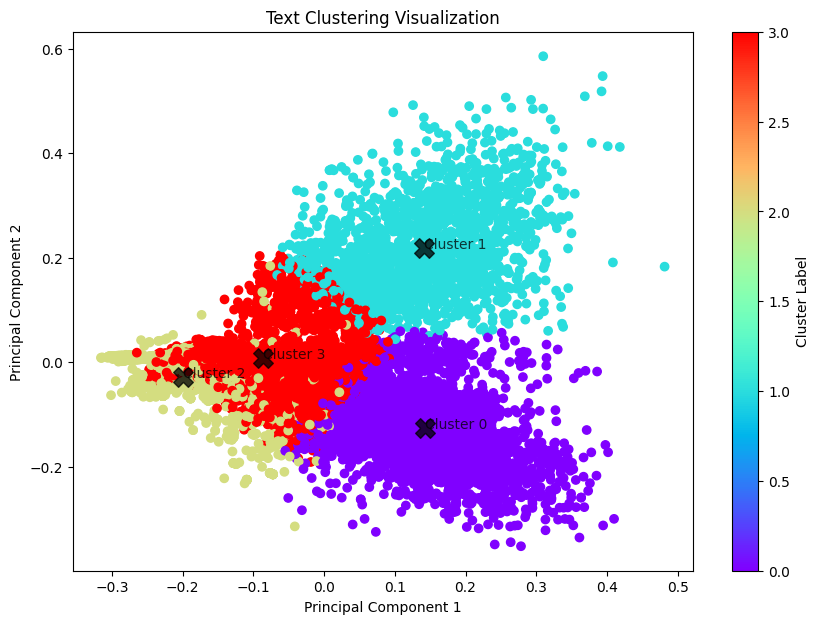

In [35]:
# Step 6: Visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=model.labels_, cmap='rainbow')
plt.title("Text Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding cluster centers to the plot
centers = model.cluster_centers_
centers_reduced = pca.transform(centers)
plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='black', s=200, alpha=0.75, marker='X')

# Adding labels to the plot
# for i, txt in enumerate(texts):
#     plt.annotate(txt, (X_reduced[i, 0], X_reduced[i, 1]), fontsize=9, alpha=0.75)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(number_of_clusters):
    plt.annotate(
        # ' '.join([terms[ind] for ind in order_centroids[i, :10]]),
        "Cluster %d" % (i),
        (centers_reduced[i, 0], centers_reduced[i, 1]),
        fontsize=10,
        alpha=0.75)


plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [36]:
for i in range(number_of_clusters):
    print("Cluster %d:" % (i)),
    print(', '.join([terms[ind] for ind in order_centroids[i, :20]]))

Cluster 0:
mình, học, bạn, tìm, cùng, muốn, chung, có_thể, được, nhau, cần, toán, cũng, khối, 2k7, tiếng, thi, nữ, người, nên
Cluster 1:
tớ, học, bạn, tìm, cùng, muốn, toán, có_thể, chung, được, cần, cậu, cũng, khối, nên, nhau, môn, anh, nữ, 2k7
Cluster 2:
anh, tiếng, gia_sư, dạy, tx, online, hđ, học_sinh, lớp, em, mình, cần, giao_tiếp, kèm, 11, yêu_cầu, phúc, nhận, on, sinh_viên
Cluster 3:
em, học, ai, bạn, mình, toán, tìm, thi, nhóm, người, vào, chị, cần, inbox, ôn, văn, muốn, 2k10, lớp, được


In [51]:
import math
import random

cluster_labels = ["0. Tìm bạn học chung",
                  "1. Tìm bạn học chung",
                  "2. Thầy cô tìm học sinh",
                  "3. Quảng cáo"]

# cluster_labels = [
#     '0. Tìm-nhận gia sư tiếng anh online',
#     '1. Tìm bạn học chung',
#     '2. Tìm bạn học chung',
#     '3. Share tài liệu',
#     '4. Tìm bạn học chung',
#     '5. Quảng cáo trung tâm',
#     '6. Tìm bạn học chung',
#     '7. Tìm bạn học chung',
#     '8. Tuyển thành viên',
#     '9. Tìm thầy cô',
#     '10. Tìm người kèm',

#     # '7. Hỏi giúp giải bài tập',
#     # '3. Quảng cáo bản thân',
#     # '4. Không học được',
# ]

In [67]:

testIndex1 = math.floor(random.random() * len(texts))
testIndex2 = math.floor(random.random() * len(texts))
testIndex3 = math.floor(random.random() * len(texts))

text1 = texts[testIndex1]
text2 = texts[testIndex2]
text3 = texts[testIndex3]

X1 = vectorizer.transform([text1])
cluster1 = model.predict(X1)[0]
print (testIndex1, text1)
print("-> belongs to cluster " + cluster_labels[cluster1])

print()
X2 = vectorizer.transform([text2])
cluster2 = model.predict(X2)[0]
print (testIndex2, text2)
print("-> belongs to cluster " + cluster_labels[cluster2])

print()
X3 = vectorizer.transform([text3])
cluster3 = model.predict(X3)[0]
print (testIndex3, text3)
print("-> belongs to cluster " + cluster_labels[cluster3])


1928 ôn thi tiếng anh vào 10 em nguyên xin tự giới_thiệu về bản_thân đạt 10 điểm tiếng anh kì thi vào 10 hà_nội đạt 92 điểm tiếng anh kì thi tn thpt 2 bằng 80 ielts overall 85 reading listening80 speaking cựu_học_sinh kim liên hiện_tại sinh_viên đại_học rmit đỗ 2_trường
-> belongs to cluster 2. Thầy cô tìm học sinh

10312 tớ cần tìm bạn học chung toán anh giỏi toán tí kéo tớ nhooo tớ cthe giúp av
-> belongs to cluster 1. Tìm bạn học chung

2638 em sinh_viên năm nhất học_viện công_nghệ bưu_chính viễn_thông ielts 60 điểm thi vào 10 10 điểm anh gpa tiếng anh luôn 9 em muốn tìm học_sinh khoảng cấp 2 cấp 3 mất_gốc ôn thi thptqg em ở quanh khu nam từ_liêm cầu_giấy hà_đông
-> belongs to cluster 3. Quảng cáo


In [55]:
# prompt: create a dataframe from df, contain post_id, post_text and cluster_label

df['cluster_label'] = model.labels_
new_df = df[['post_id', 'post_text', 'cluster_label']]

new_df = new_df[new_df['cluster_label'].isin([0,1])]
new_df = new_df[~new_df['post_text'].str.contains('thành_viên|tuyển_sinh|tuyển sinh')]

new_df

,post_id,post_text,cluster_label
6,906378388075245,vào inbox tớ,1
54,906063554773395,tớ thi học_sinh_giỏi địa 9 bạn điện_thoại địa ...,1
89,904931454886605,cứu tớ tớ mất_gốc hình rùiii,1
92,904915061554911,giải giúp mình câu mình cám_ơn,0
125,905487218164362,ê tớ học toán hình mà tớ biết sin cos cái gì t...,1
...,...,...,...
16778,791061549819061,chào mọi người tớ nữ 2k5 hiện học trên hà_nội ...,1
16789,791061863152363,halloo mngg mình 2k8 ngoi lên đây tìm 1 bạn có...,0
16790,790767139848502,mình 2007 mất_gốc tiếng anh bắt_đầu học lại bạ...,0
16791,790742003184349,mình 2k4 tìm bạn học cũng sinh_viên học cùng,0
